In [50]:
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading

## Load 1950-2100 Data

In [3]:
# Load average temperature data
mean_annual = xr.open_dataset('../data/processed/t_ref.rcp85.ens3mean_annual.1950_2100.nc')['t_ref']

# Load max temperature data
mean_annual_max = xr.open_dataset('../data/processed/t_ref_max.rcp85.ens3mean_annual.1950_2100.nc')['t_ref_max']

## Load Area Data

In [5]:
# Load area data
rootdir = '/local/ss23/GFDL_LEs/ATM/'
filename_area = 'land_static.nc'
path_area = rootdir+filename_area
land_area = xr.open_dataset(path_area)['land_area']

# t_ref (Average Temperature)

## Overview of Area-Weighted Averages

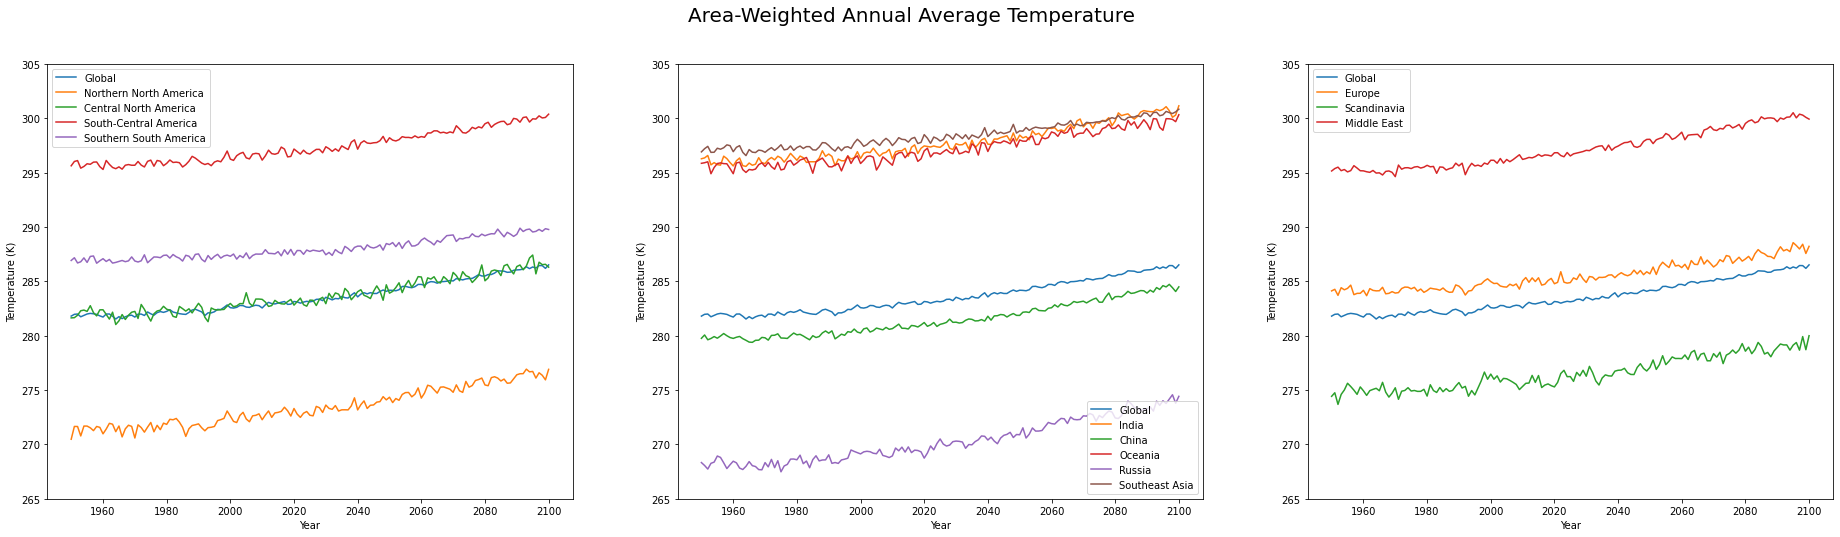

In [35]:
# Create figure, axes
fig, axs = plt.subplots(figsize=(32,8),ncols=3)

# Calculate area-weighted averages
regions1 = ['Global','Northern North America','Central North America','South-Central America','Southern South America']
regions2 = ['Global','India','China','Oceania','Russia','Southeast Asia']
regions3 = ['Global','Europe','Scandinavia','Middle East']

# Subplot index
index = 0

# Plot regions
for subset in [regions1,regions2,regions3]:
    ax = axs[index]
    for region in subset:
        # Calculate area-weighted average temperature
        ds_region = mf.slice_region()
    
        # Calculate area-weighted average
        area_mean = (temp*area).sum(['lon','lat'])/area.sum(['lon','lat'])

        # Plot area-weighted average
        regional_mean.plot(ax=ax)

    # Set title + legend
    ax.legend(subset)
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (K)')
    ax.set_ylim([265,305])
    index+=1

# Overarching title
fig.suptitle('Area-Weighted Annual Average Temperature',fontsize=20)
fig.savefig('allregions_ts.png')

## Most Relevant Area-Weighted Averages, Versus Global

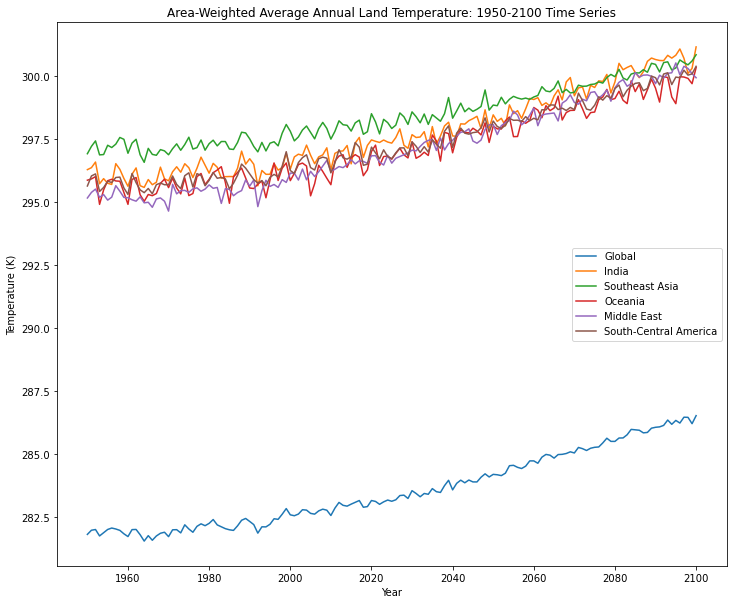

In [27]:
# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate area-weighted averages
regions = ['Global','India','Southeast Asia','Oceania','Middle East','South-Central America']

# Plot regions
for region in regions:
    # Calculate area-weighted average temperature
    regional_mean = mf.area_weighted(mean_annual,land_area,region)

    # Plot area-weighted average
    regional_mean.plot(ax=ax)

# Set title + legend and save figure
ax.set_title('Area-Weighted Average Annual Land Temperature: 1950-2100 Time Series')
ax.legend(regions,loc='center right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (K)')
fig.savefig('regional_ts.png')

## Regional Area-Weighted Averages: 1950-2100

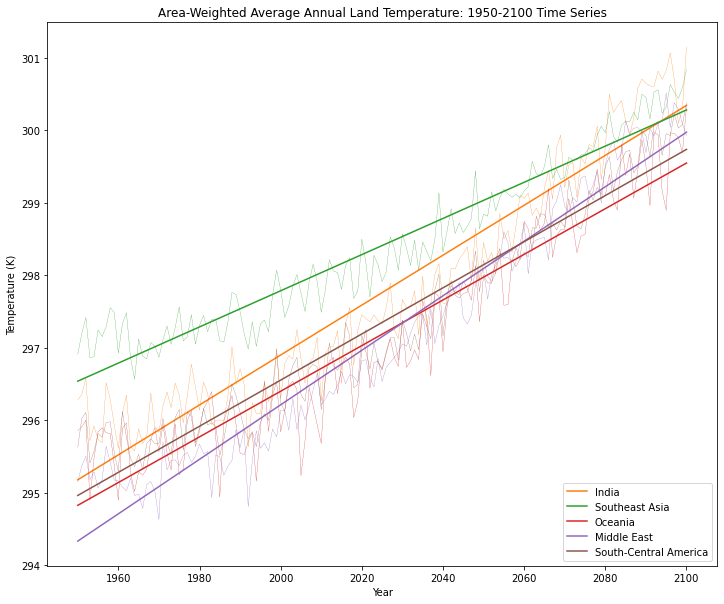

In [15]:
# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate area-weighted averages
regions = ['India','Southeast Asia','Oceania','Middle East','South-Central America']

# Running counter for line color
cindex = 1

# Plot regions
for region in regions:
    # Calculate area-weighted average temperature
    regional_mean = mf.area_weighted(mean_annual,land_area,region)
    
    color = 'C' + str(cindex) 
    # Plot area-weighted average
    regional_mean.plot(ax=ax,linewidth=0.25,color=color)
    
    # Plot trendline
    x = regional_mean['year']
    y = np.polyfit(x, regional_mean, 1)
    p = np.poly1d(y)
    ax.plot(x,p(x),color=color)
    
    # Increment line color counter
    cindex+=1

# Set title + legend and save figure
ax.set_title('Area-Weighted Average Annual Land Temperature: 1950-2100 Time Series')
ax.legend(ax.lines[1:None:2],regions,loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (K)')
fig.savefig('regional2_ts.png')

## Regional Area-Weighted Averages: 2020-2100

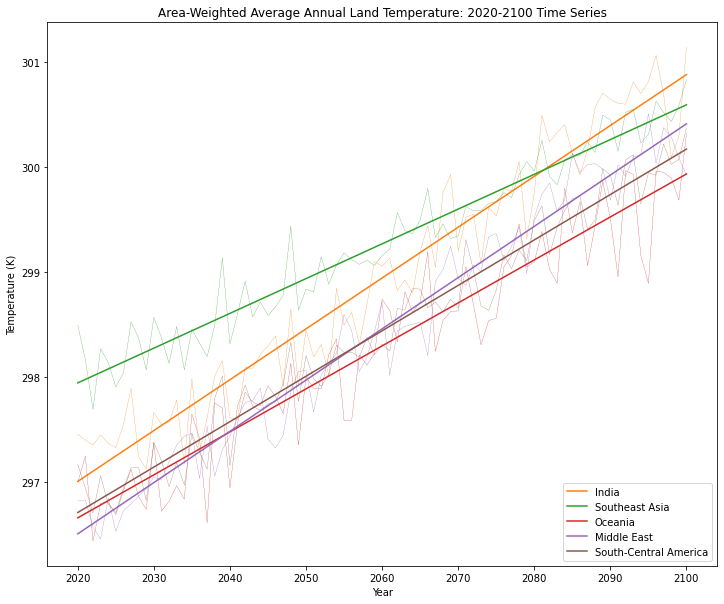

In [37]:
# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate area-weighted averages
regions = ['India','Southeast Asia','Oceania','Middle East','South-Central America']

# Running counter for line color
cindex = 1

# Plot regions
for region in regions:
    # Calculate area-weighted average temperature
    regional_mean = mf.area_weighted(mean_annual.sel(year=slice(2020,2100)),land_area,region)
    
    color = 'C' + str(cindex) 
    # Plot area-weighted average
    regional_mean.plot(ax=ax,linewidth=0.25,color=color)
    
    # Plot trendline
    x = regional_mean['year']
    y = np.polyfit(x, regional_mean, 1)
    p = np.poly1d(y)
    ax.plot(x,p(x),color=color)
    
    # Increment line color counter
    cindex+=1

# Set title + legend and save figure
ax.set_title('Area-Weighted Average Annual Land Temperature: 2020-2100 Time Series')
ax.legend(ax.lines[1:None:2],regions,loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (K)')
fig.savefig('regional3_ts.png')

## Plot Temperature Changes

In [39]:
# Calculate decadal average for 1950s and 2090s
ds_2090 = mean_annual.isel(year=slice(-10,None)).mean(dim='year')
ds_1950 = mean_annual.isel(year=slice(0,10)).mean(dim='year')

# Calculate difference in average temperature
ds_diff = ds_2090 - ds_1950

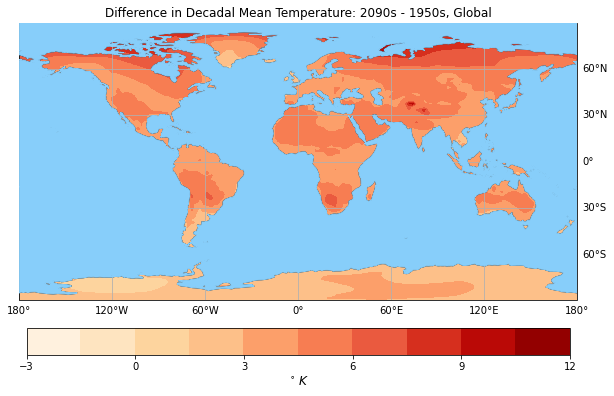

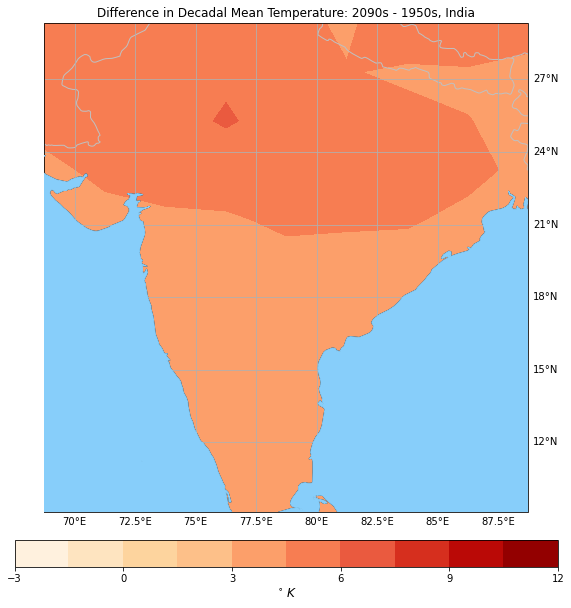

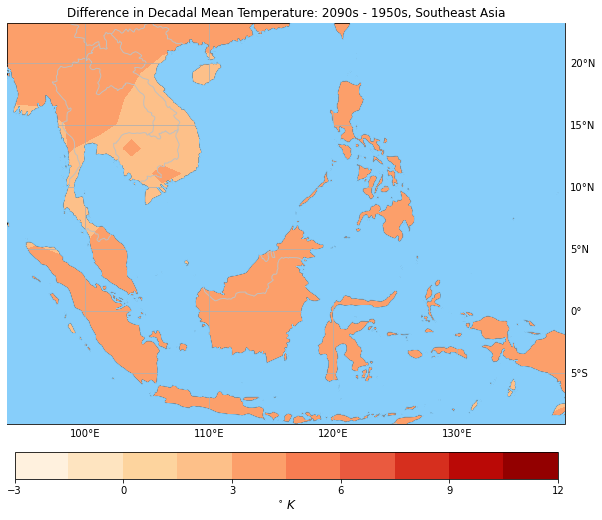

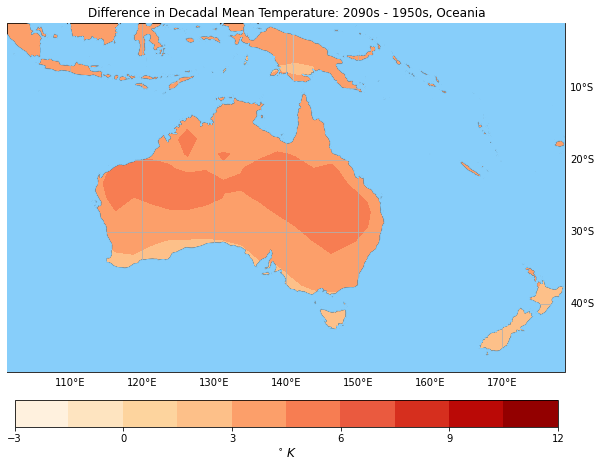

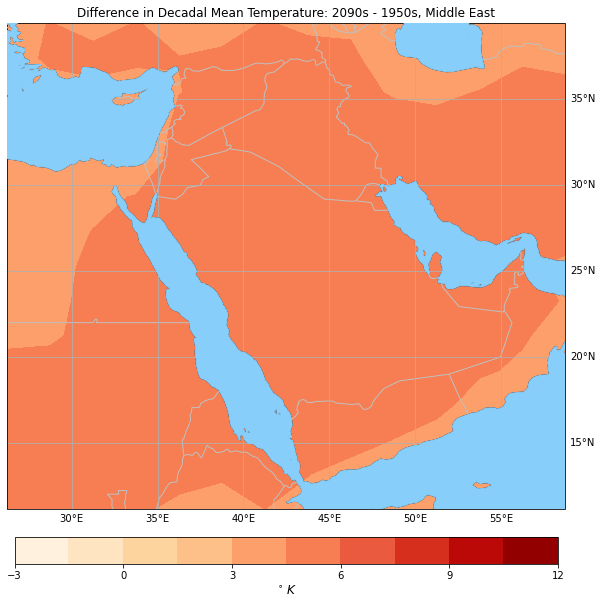

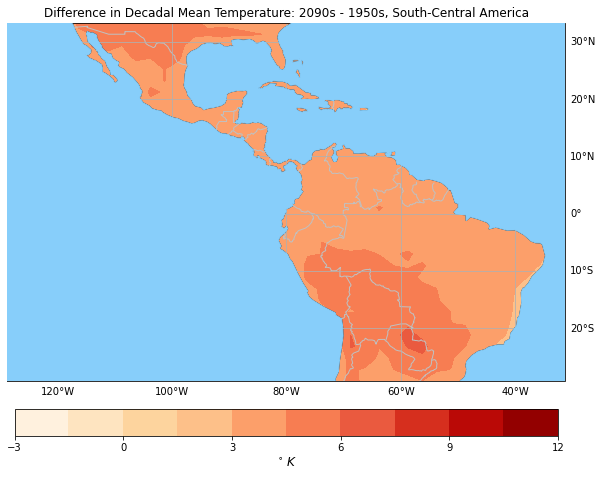

In [70]:
# Plot global difference
mf.contour_plot(ds_diff,region='Global',title='Difference in Decadal Mean Temperature: 2090s - 1950s, Global',cmap='OrRd')
plt.savefig('Global2.png')

# Plot regional differences
for region in ['India','Southeast Asia','Oceania','Middle East','South-Central America']:
    mf.contour_plot(ds_diff,region=region,title='Difference in Decadal Mean Temperature: 2090s - 1950s, '+region,cmap='OrRd',borders=True)
    plt.savefig(region+'2.png')

## Plot 2090s Mean Temperature

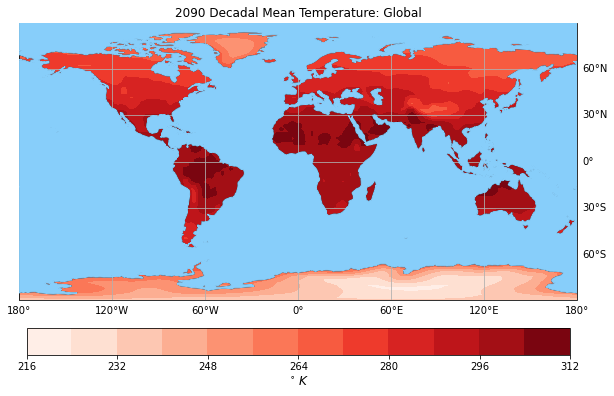

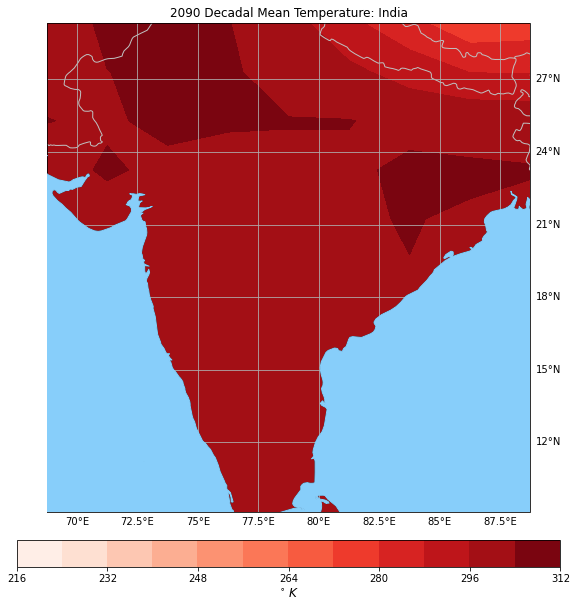

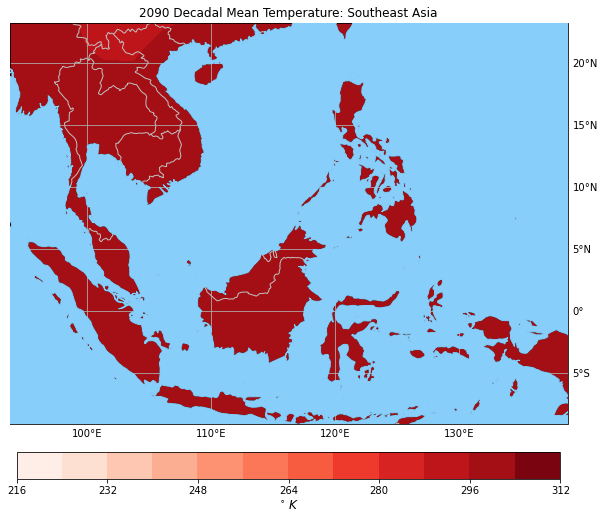

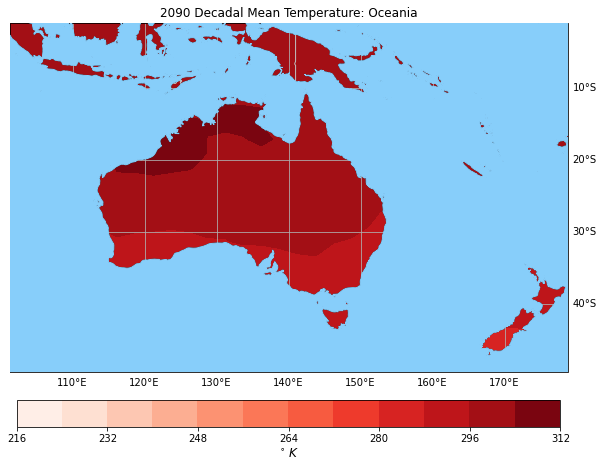

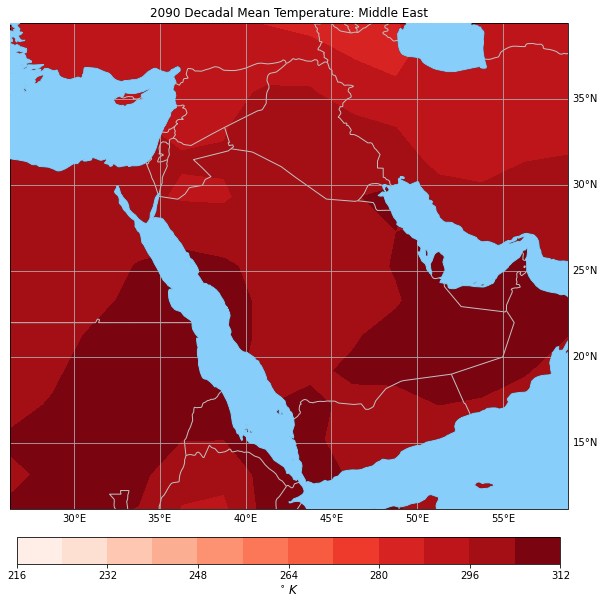

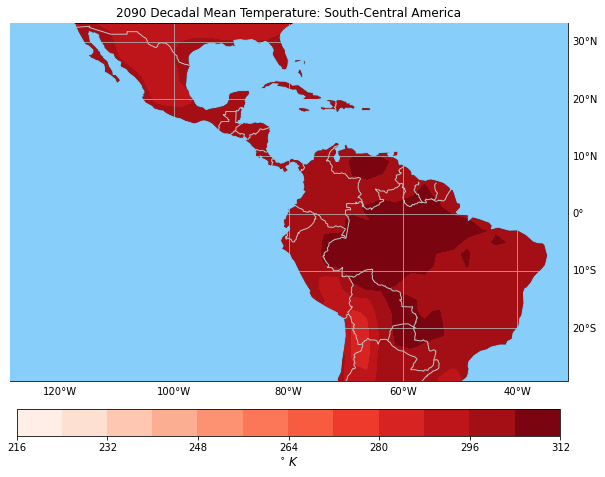

In [66]:
# Plot global temperature
mf.contour_plot(ds_2090,region='Global',title='2090 Decadal Mean Temperature: Global',cmap='Reds')
plt.savefig('Global.png')

# Plot regional temperatures
for region in ['India','Southeast Asia','Oceania','Middle East','South-Central America']:
    mf.contour_plot(ds_2090,region=region,title='2090 Decadal Mean Temperature: '+region,cmap='Reds',borders=True)
    plt.savefig(region+'.png')

# t_ref_max (Max Temperature)

## Most Relevant Area-Weighted Temperatures, Versus Global

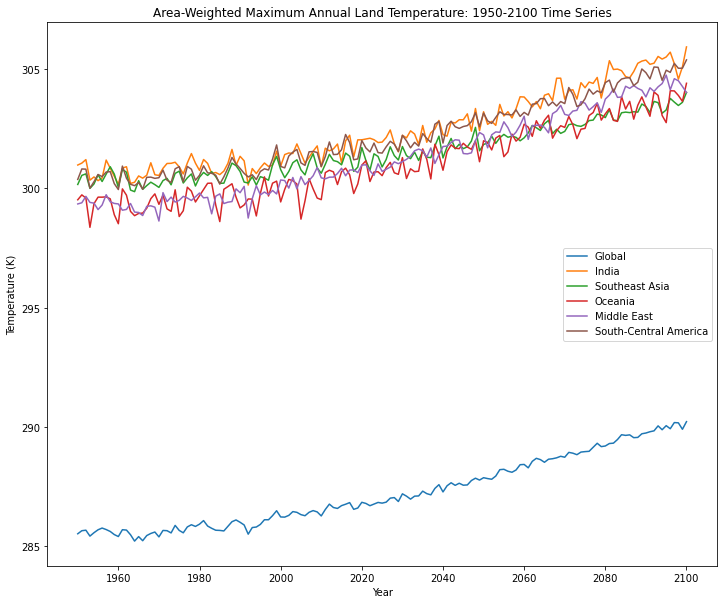

In [12]:
# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate area-weighted averages
regions = ['Global','India','Southeast Asia','Oceania','Middle East','South-Central America']

# Plot regions
for region in regions:
    # Calculate area-weighted average temperature
    regional_mean = mf.area_weighted(mean_annual_max,land_area,region)

    # Plot area-weighted average
    regional_mean.plot(ax=ax)

# Set title + legend and save figure
ax.set_title('Area-Weighted Maximum Annual Land Temperature: 1950-2100 Time Series')
ax.legend(regions,loc='center right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (K)')
fig.savefig('regional_max_ts.png')

## Regional Area-Weighted Averages

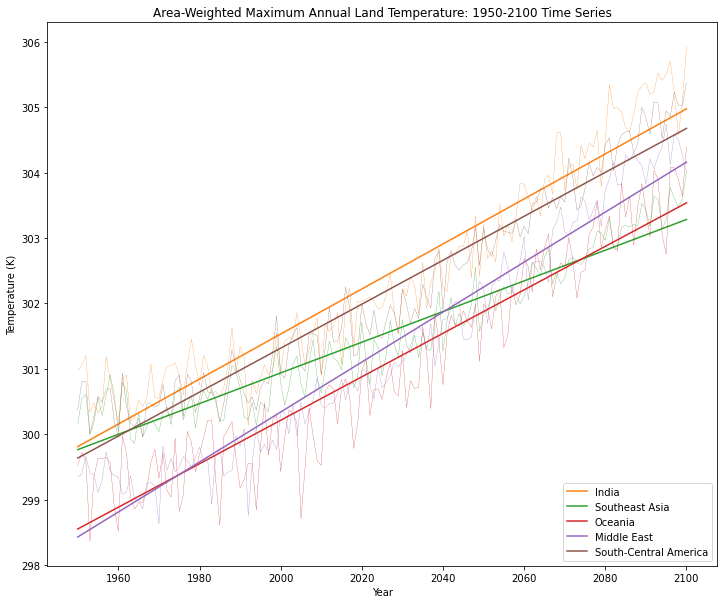

In [16]:
# Create figure, axes
fig, ax = plt.subplots(figsize=(12,10))

# Calculate area-weighted averages
regions = ['India','Southeast Asia','Oceania','Middle East','South-Central America']

# Running counter for line color
cindex = 1

# Plot regions
for region in regions:
    # Calculate area-weighted average temperature
    regional_mean = mf.area_weighted(mean_annual_max,land_area,region)
    
    color = 'C' + str(cindex) 
    # Plot area-weighted average
    regional_mean.plot(ax=ax,linewidth=0.25,color=color)
    
    # Plot trendline
    x = regional_mean['year']
    y = np.polyfit(x, regional_mean, 1)
    p = np.poly1d(y)
    ax.plot(x,p(x),color=color)
    
    # Increment line color counter
    cindex+=1

# Set title + legend and save figure
ax.set_title('Area-Weighted Maximum Annual Land Temperature: 1950-2100 Time Series')
ax.legend(ax.lines[1:None:2],regions,loc='lower right')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (K)')
fig.savefig('regional2_max_ts.png')